*Dog VS Cat classifier*

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:53<00:00, 20.3MB/s]
100% 1.06G/1.06G [00:53<00:00, 21.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds=tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# creating a CNN modal
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),padding="valid", input_shape = (256, 256, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2,padding="valid"))

model.add(Conv2D(64, kernel_size=(3, 3),padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2,padding="valid"))

model.add(Conv2D(128, kernel_size=(3, 3),padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 78ms/step - accuracy: 0.6163 - loss: 0.6593 - val_accuracy: 0.7572 - val_loss: 0.5010
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.7619 - loss: 0.4920 - val_accuracy: 0.7930 - val_loss: 0.4449
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.8257 - loss: 0.3858 - val_accuracy: 0.7818 - val_loss: 0.5326
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 82ms/step - accuracy: 0.8905 - loss: 0.2595 - val_accuracy: 0.7764 - val_loss: 0.7483
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9451 - loss: 0.1420 - val_accuracy: 0.7896 - val_loss: 0.8888
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.9655 - loss: 0.1016 - val_accuracy: 0.7848 - val_loss: 1.2143
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 85ms/step - accuracy: 0.9798 - loss: 0.0667 - val_accuracy: 0.7874 - val_loss: 1.1707
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.9851 - loss: 0.0467 - 

# Testing the Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step


array([[1.]], dtype=float32)

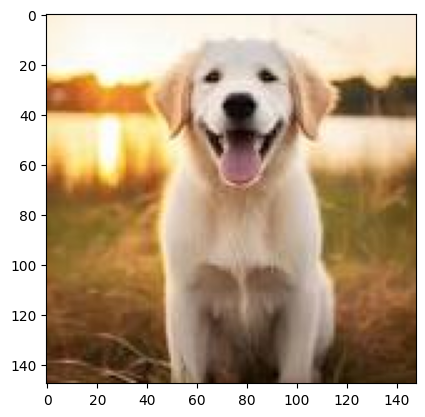

In [ ]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('/content/dog.jpeg') # reading the img data
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # converting it to RGB
plt.imshow(img)
img=cv2.resize(img,(256,256)) # resizing it
img=img.reshape(-1,256,256,3)
model.predict(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.]], dtype=float32)

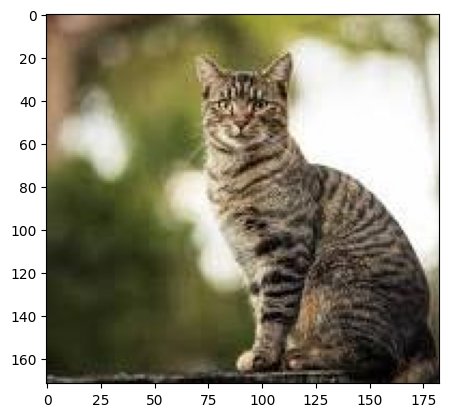

In [ ]:
img=cv2.imread('/content/cat.jpeg') # reading the img data
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # converting it to RGB
plt.imshow(img)
img=cv2.resize(img,(256,256)) # resizing it
img=img.reshape(-1,256,256,3)
model.predict(img)
